# Importing libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Dataset

In [3]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

In [4]:
X_test.shape[1:]

(32, 32, 3)

In [5]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
def plot_sample(X, Y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index][0]])

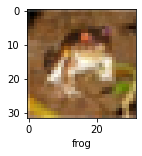

In [7]:
plot_sample(X_train, Y_train, 0)

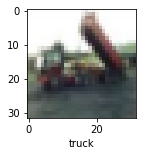

In [8]:
plot_sample(X_train, Y_train, 2)

# Preprocessing

In [9]:
X_train = X_train / 255
X_test = X_test / 255

# Multi-Layered Perceptron Model

In [10]:
mlp = models.Sequential([
    layers.Flatten(input_shape=(X_train.shape[1:])),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(len(classes), activation='sigmoid'),
])

mlp.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

mlp.fit(X_train, Y_train, epochs=5)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
50000/50000 [==============================] - 57s 1ms/sample - loss: 1.8622 - acc: 0.3319
Epoch 2/5
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.6601 - acc: 0.4126
Epoch 3/5
50000/50000 [==============================] - 61s 1ms/sample - loss: 1.5720 - acc: 0.4446
Epoch 4/5
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.5121 - acc: 0.4657
Epoch 5/5
50000/50000 [==============================] - 65s 1ms/sample - loss: 1.4622 - acc: 0.4847


In [11]:
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 3000)              9219000   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3001000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [12]:
mlp.evaluate(X_test, Y_test)

10000/10000 [==============================] - 3s 290us/sample - loss: 1.5119 - acc: 0.4647


[1.511865912437439, 0.4647]

In [13]:
Y_pred = mlp.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]

print('Classification report:\n', classification_report(Y_test, Y_pred_classes))

Classification report:
               precision    recall  f1-score   support

           0       0.45      0.70      0.55      1000
           1       0.59      0.63      0.61      1000
           2       0.36      0.29      0.33      1000
           3       0.38      0.26      0.31      1000
           4       0.52      0.19      0.28      1000
           5       0.40      0.36      0.38      1000
           6       0.35      0.82      0.49      1000
           7       0.54      0.52      0.53      1000
           8       0.69      0.50      0.58      1000
           9       0.70      0.36      0.48      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



# Convolutional Neural Network Model

In [14]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(X_train.shape[1:])),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(classes), activation='sigmoid'),
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [12]:
cnn_history = cnn.fit(X_train, Y_train, epochs=10, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 30s 671us/sample - loss: 1.5783 - acc: 0.4251 - val_loss: 1.2406 - val_acc: 0.5608
Epoch 2/10
45000/45000 [==============================] - 31s 680us/sample - loss: 1.1965 - acc: 0.5794 - val_loss: 1.1042 - val_acc: 0.6146
Epoch 3/10
45000/45000 [==============================] - 30s 669us/sample - loss: 1.0553 - acc: 0.6332 - val_loss: 1.0406 - val_acc: 0.6490
Epoch 4/10
45000/45000 [==============================] - 31s 683us/sample - loss: 0.9730 - acc: 0.6606 - val_loss: 0.9901 - val_acc: 0.6594
Epoch 5/10
45000/45000 [==============================] - 31s 680us/sample - loss: 0.9086 - acc: 0.6879 - val_loss: 0.9558 - val_acc: 0.6754
Epoch 6/10
45000/45000 [==============================] - 31s 698us/sample - loss: 0.8572 - acc: 0.7017 - val_loss: 0.9175 - val_acc: 0.6858
Epoch 7/10
45000/45000 [==============================] - 58s 1ms/sample - loss: 0.8078 - acc: 0.7197 - v

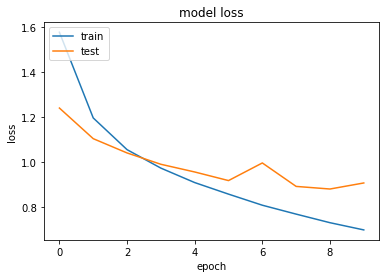

In [13]:
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
cnn.evaluate(X_test, Y_test)

10000/10000 [==============================] - 4s 402us/sample - loss: 0.9434 - acc: 0.6842


[0.9434128533363342, 0.6842]

In [15]:
Y_pred = cnn.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]

print('Classification report:\n', classification_report(Y_test, Y_pred_classes))

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73      1000
           1       0.78      0.85      0.82      1000
           2       0.53      0.63      0.57      1000
           3       0.50      0.50      0.50      1000
           4       0.57      0.72      0.63      1000
           5       0.64      0.50      0.56      1000
           6       0.79      0.73      0.76      1000
           7       0.82      0.66      0.73      1000
           8       0.86      0.71      0.78      1000
           9       0.75      0.81      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.69     10000
weighted avg       0.69      0.68      0.69     10000



# Improved CNN

In [15]:
icnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', 
                  padding='same', input_shape=(X_train.shape[1:])),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),
    
    # dense
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    layers.Dropout(0.5),
    layers.Dense(len(classes), activation='softmax'),
])

opt = optimizers.SGD(lr=0.001, momentum=0.9)
icnn.compile(optimizer=opt,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

icnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)         

In [22]:
icnn_history = icnn.fit(X_train, Y_train, epochs=50, batch_size=64, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 180s 4ms/sample - loss: 2.2580 - acc: 0.1474 - val_loss: 2.1163 - val_acc: 0.2666
Epoch 2/50
45000/45000 [==============================] - 177s 4ms/sample - loss: 1.9902 - acc: 0.2575 - val_loss: 1.8387 - val_acc: 0.3274
Epoch 3/50
45000/45000 [==============================] - 174s 4ms/sample - loss: 1.8261 - acc: 0.3181 - val_loss: 1.6916 - val_acc: 0.3822
Epoch 4/50
45000/45000 [==============================] - 94s 2ms/sample - loss: 1.7257 - acc: 0.3550 - val_loss: 1.6314 - val_acc: 0.4014
Epoch 5/50
45000/45000 [==============================] - 94s 2ms/sample - loss: 1.6508 - acc: 0.3878 - val_loss: 1.5149 - val_acc: 0.4518
Epoch 6/50
45000/45000 [==============================] - 93s 2ms/sample - loss: 1.5809 - acc: 0.4170 - val_loss: 1.4460 - val_acc: 0.4708
Epoch 7/50
45000/45000 [==============================] - 93s 2ms/sample - loss: 1.5330 - acc: 0.4376 - val_loss: 

In [24]:
filepath = 'model/icnn_50.h5'
icnn.save(filepath)

In [26]:
model = models.load_model(filepath)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


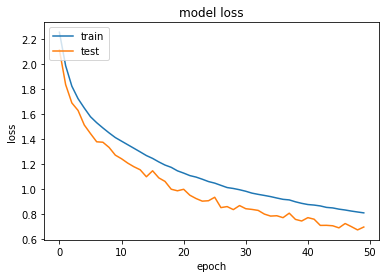

In [29]:
plt.plot(icnn_history.history['loss'])
plt.plot(icnn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 100s 2ms/sample - loss: 0.8036 - acc: 0.7174 - val_loss: 0.6618 - val_acc: 0.7732
Epoch 2/50
45000/45000 [==============================] - 94s 2ms/sample - loss: 0.7971 - acc: 0.7195 - val_loss: 0.6771 - val_acc: 0.7668
Epoch 3/50
45000/45000 [==============================] - 94s 2ms/sample - loss: 0.7831 - acc: 0.7241 - val_loss: 0.6734 - val_acc: 0.7664
Epoch 4/50
45000/45000 [==============================] - 94s 2ms/sample - loss: 0.7811 - acc: 0.7257 - val_loss: 0.6870 - val_acc: 0.7664
Epoch 5/50
45000/45000 [==============================] - 95s 2ms/sample - loss: 0.7742 - acc: 0.7272 - val_loss: 0.6493 - val_acc: 0.7756
Epoch 6/50
45000/45000 [==============================] - 94s 2ms/sample - loss: 0.7679 - acc: 0.7303 - val_loss: 0.6937 - val_acc: 0.7602
Epoch 7/50
45000/45000 [==============================] - 94s 2ms/sample - loss: 0.7666 - acc: 0.7302 - val_loss: 0.

In [31]:
icnn_history = model.fit(X_train, Y_train, epochs=1, batch_size=64, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
45000/45000 [==============================] - 185s 4ms/sample - loss: 0.5988 - acc: 0.7907 - val_loss: 0.5716 - val_acc: 0.8054


In [32]:
filepath = 'model/icnn_86.h5'
model.save(filepath)

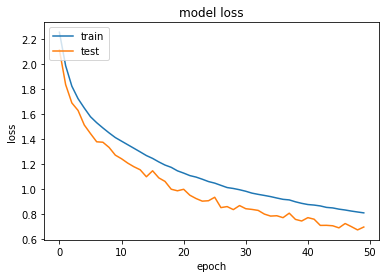

In [33]:
plt.plot(icnn_history.history['loss'])
plt.plot(icnn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 11s 1ms/sample - loss: 0.6142 - acc: 0.78841s -


[0.6141970194339752, 0.7884]

In [36]:
Y_pred = model.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]

print('Classification report:\n', classification_report(Y_test, Y_pred_classes))

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      1000
           1       0.92      0.89      0.90      1000
           2       0.75      0.66      0.70      1000
           3       0.67      0.55      0.60      1000
           4       0.67      0.85      0.75      1000
           5       0.73      0.67      0.70      1000
           6       0.68      0.94      0.79      1000
           7       0.90      0.77      0.83      1000
           8       0.87      0.91      0.89      1000
           9       0.89      0.89      0.89      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



In [10]:
filepath = 'model/icnn_86.h5'
model = models.load_model(filepath)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
icnn_history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 174s 4ms/sample - loss: 0.5778 - acc: 0.7981 - val_loss: 0.5273 - val_acc: 0.8194
Epoch 2/10
45000/45000 [==============================] - 177s 4ms/sample - loss: 0.5788 - acc: 0.7977 - val_loss: 0.5281 - val_acc: 0.8160
Epoch 3/10
45000/45000 [==============================] - 139s 3ms/sample - loss: 0.5742 - acc: 0.7969 - val_loss: 0.5154 - val_acc: 0.8216
Epoch 4/10
45000/45000 [==============================] - 94s 2ms/sample - loss: 0.5709 - acc: 0.8009 - val_loss: 0.5351 - val_acc: 0.8144
Epoch 5/10
45000/45000 [==============================] - 93s 2ms/sample - loss: 0.5665 - acc: 0.8026 - val_loss: 0.5422 - val_acc: 0.8144
Epoch 6/10
45000/45000 [==============================] - 94s 2ms/sample - loss: 0.5652 - acc: 0.8008 - val_loss: 0.5214 - val_acc: 0.8204
Epoch 7/10
45000/45000 [==============================] - 95s 2ms/sample - loss: 0.5602 - acc: 0.8046 - val_loss: 

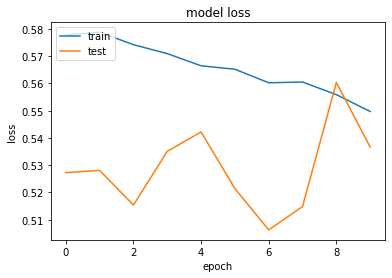

In [15]:
plt.plot(icnn_history.history['loss'])
plt.plot(icnn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 5s 527us/sample - loss: 0.5750 - acc: 0.8022


[0.5749736934185028, 0.8022]

In [17]:
Y_pred = model.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]

print('Classification report:\n', classification_report(Y_test, Y_pred_classes))

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1000
           1       0.91      0.91      0.91      1000
           2       0.82      0.62      0.71      1000
           3       0.64      0.61      0.63      1000
           4       0.68      0.87      0.77      1000
           5       0.77      0.66      0.71      1000
           6       0.72      0.93      0.81      1000
           7       0.89      0.82      0.85      1000
           8       0.93      0.88      0.90      1000
           9       0.90      0.88      0.89      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



In [19]:
filepath = 'model/icnn_100.h5'
model.save(filepath)